In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats,lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [5]:
# Create an empty list to hold the weather data.
city_data = []

#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san lawrenz
Processing Record 2 of Set 1 | grants
Processing Record 3 of Set 1 | sabang
Processing Record 4 of Set 1 | caravelas
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | chapais
Processing Record 9 of Set 1 | mahebourg
Processing Record 10 of Set 1 | tignere
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | nanortalik
Processing Record 14 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 15 of Set 1 | jiddah
City not found. Skipping...
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | sikeston
Processing Record 22 of Set 1 | h

Processing Record 39 of Set 4 | bo phloi
Processing Record 40 of Set 4 | naantali
Processing Record 41 of Set 4 | san patricio
Processing Record 42 of Set 4 | kahului
Processing Record 43 of Set 4 | atherton
Processing Record 44 of Set 4 | anchorage
Processing Record 45 of Set 4 | dingle
Processing Record 46 of Set 4 | katsuura
Processing Record 47 of Set 4 | palana
Processing Record 48 of Set 4 | puerto suarez
Processing Record 49 of Set 4 | abalak
Processing Record 50 of Set 4 | mezen
Processing Record 1 of Set 5 | kyra
Processing Record 2 of Set 5 | clyde river
Processing Record 3 of Set 5 | plouzane
Processing Record 4 of Set 5 | iracoubo
Processing Record 5 of Set 5 | catamarca
Processing Record 6 of Set 5 | samusu
City not found. Skipping...
Processing Record 7 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 8 of Set 5 | margate
Processing Record 9 of Set 5 | paka
Processing Record 10 of Set 5 | bukan
Processing Record 11 of Set 5 | luwingu
Processing Recor

Processing Record 27 of Set 8 | jizan
Processing Record 28 of Set 8 | pangody
Processing Record 29 of Set 8 | trenggalek
Processing Record 30 of Set 8 | darhan
Processing Record 31 of Set 8 | chegdomyn
Processing Record 32 of Set 8 | fort saint james
Processing Record 33 of Set 8 | lowestoft
Processing Record 34 of Set 8 | buta
Processing Record 35 of Set 8 | sikonge
Processing Record 36 of Set 8 | vangaindrano
Processing Record 37 of Set 8 | meadow lake
Processing Record 38 of Set 8 | mount isa
Processing Record 39 of Set 8 | chanika
Processing Record 40 of Set 8 | manggar
Processing Record 41 of Set 8 | crab hill
City not found. Skipping...
Processing Record 42 of Set 8 | port pirie
Processing Record 43 of Set 8 | calama
Processing Record 44 of Set 8 | oussouye
Processing Record 45 of Set 8 | linhai
Processing Record 46 of Set 8 | dutlwe
Processing Record 47 of Set 8 | hualmay
Processing Record 48 of Set 8 | kamiichi
Processing Record 49 of Set 8 | tiarei
Processing Record 50 of Set 

Processing Record 15 of Set 12 | saldanha
Processing Record 16 of Set 12 | laguna
Processing Record 17 of Set 12 | road town
Processing Record 18 of Set 12 | yenagoa
Processing Record 19 of Set 12 | mamallapuram
Processing Record 20 of Set 12 | ngama
Processing Record 21 of Set 12 | namatanai
Processing Record 22 of Set 12 | robertsport
Processing Record 23 of Set 12 | makakilo city
Processing Record 24 of Set 12 | nouadhibou
Processing Record 25 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 26 of Set 12 | tarko-sale
Processing Record 27 of Set 12 | ondangwa
Processing Record 28 of Set 12 | natal
Processing Record 29 of Set 12 | el mante
Processing Record 30 of Set 12 | arequipa
Processing Record 31 of Set 12 | mama
Processing Record 32 of Set 12 | satitoa
City not found. Skipping...
Processing Record 33 of Set 12 | buchanan
Processing Record 34 of Set 12 | marigot
Processing Record 35 of Set 12 | zhanakorgan
Processing Record 36 of Set 12 | takoradi
Processing 

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_column = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_column]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Lawrenz,MT,2021-08-03 00:33:42,36.0553,14.2040,83.86,59,58,5.93
1,Grants,US,2021-08-03 00:33:42,35.1473,-107.8514,70.03,52,90,3.44
2,Sabang,ID,2021-08-03 00:33:43,5.8933,95.3214,82.92,75,100,19.75
3,Caravelas,BR,2021-08-03 00:33:43,-17.7125,-39.2481,66.16,80,86,3.62
4,Busselton,AU,2021-08-03 00:33:43,-33.6500,115.3333,55.13,79,99,7.63
5,Punta Arenas,CL,2021-08-03 00:33:44,-53.1500,-70.9167,39.31,81,20,33.38
6,Albany,US,2021-08-03 00:29:20,42.6001,-73.9662,68.79,68,3,8.57
7,Chapais,CA,2021-08-03 00:33:44,49.7834,-74.8492,64.18,66,100,9.64
8,Mahebourg,MU,2021-08-03 00:33:44,-20.4081,57.7000,59.29,88,20,5.75
9,Tignere,CM,2021-08-03 00:33:44,7.3667,12.6500,64.31,98,100,3.11


In [7]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [8]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

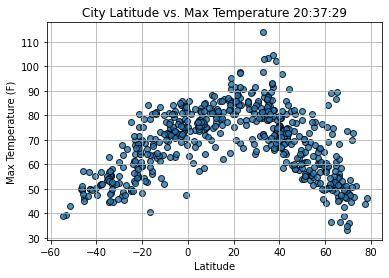

In [9]:
#Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor = "black", linewidth = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%X"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

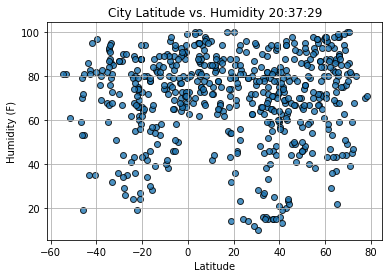

In [10]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor = "black", linewidth = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%X"))
plt.ylabel("Humidity (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

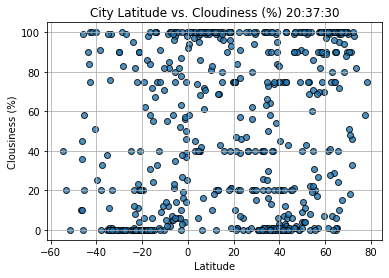

In [11]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor = "black", linewidth = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%X"))
plt.ylabel("Clousiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

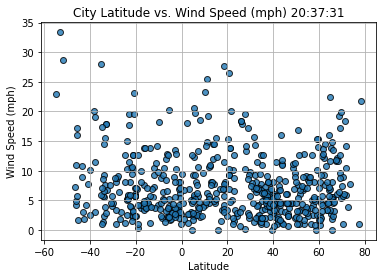

In [12]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolor = "black", linewidth = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) " + time.strftime("%X"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()

In [13]:
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [14]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

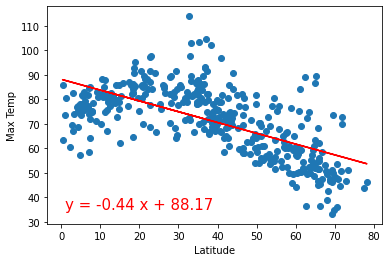

In [15]:
# Linear regression on the Northern Hemisphere Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(1,35))

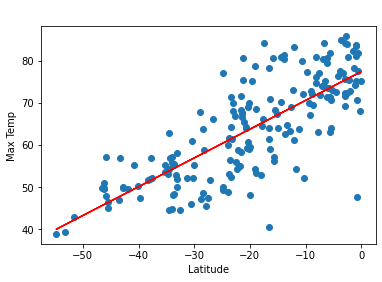

In [16]:
# Linear regression on the Northern Hemisphere Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,90))

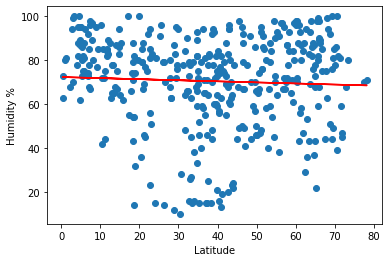

In [17]:
# Linear regression on the Northern Hemisphere Humidity%
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Humidity %', 'Humidity %',(-1,5))

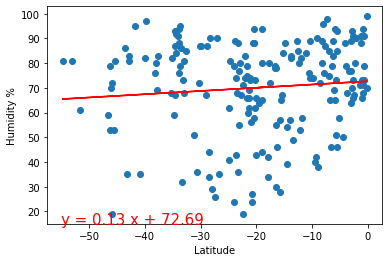

In [18]:
# Linear regression on the Southern Hemisphere Humidity%
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Humidity %', 'Humidity %',(-55,15))

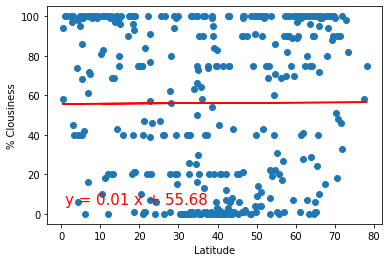

In [19]:
# Linear regression on the Northern Hemisphere Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Clousiness',(1,5))

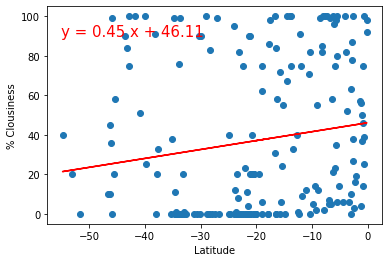

In [20]:
# Linear regression on the Southern Hemisphere Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Clousiness',(-55,90))

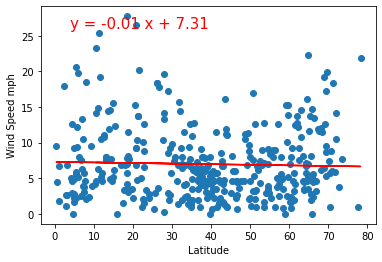

In [21]:
# Linear regression on the Northern Hemisphere Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed mph',(4,26))

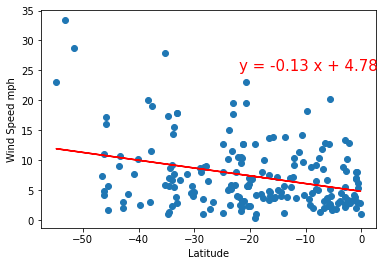

In [22]:
# Linear regression on the Southern Hemisphere Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed mph',(-22,25))